# ETS Data Mining Kelas B

### Nadhifa Ayu Shafirra (06211640000064)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 08:26,3.39,17850.0,United Kingdom


In [11]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 08:26,3.39,17850.0,United Kingdom,20.34


In [12]:
data.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


### Jumlah Transaksi 

In [14]:
len(data['InvoiceNo'].unique())

25900

In [15]:
#Jumlah transaksi dengan CustomerID NULL (Tidak terdefinisi)
len(data[data['CustomerID'].isnull()]['InvoiceNo'].unique())

3710

### Jumlah Customer 

In [16]:
len(data['CustomerID'].unique())

4373

### Total Penjualan 

In [17]:
sum(data['TotalAmount'])

9747747.9340031706

In [18]:
#Customer dengan pembelian harga terbesar
customers_total = data.groupby('CustomerID')['TotalAmount'].agg(np.sum).sort_values(ascending=False)
customers_total.head(10)

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: TotalAmount, dtype: float64

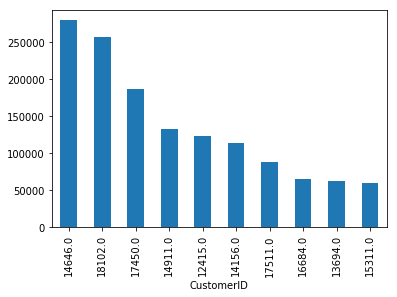

In [24]:
customers_total.head(10).plot.bar()
plt.show()

In [25]:
#Barang yang paling banyak dibeli
stockcodenew = data.groupby('Description')
freq_qty = stockcodenew['Quantity'].agg(np.sum).sort_values(ascending=False)
freq_qty.head(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

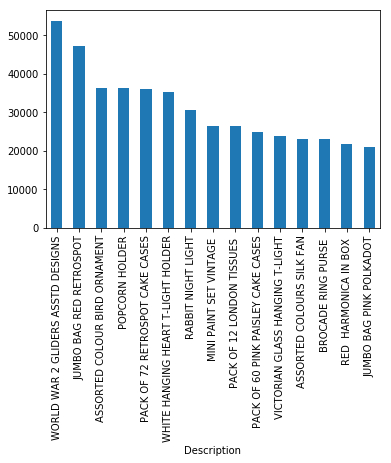

In [26]:
freq_qty.head(15).plot.bar()
plt.show()

In [27]:
#Barang dengan harga penjualan terbesar
freq_total = stockcodenew['TotalAmount'].agg(np.sum).sort_values(ascending=False)
freq_total.head(10)

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalAmount, dtype: float64

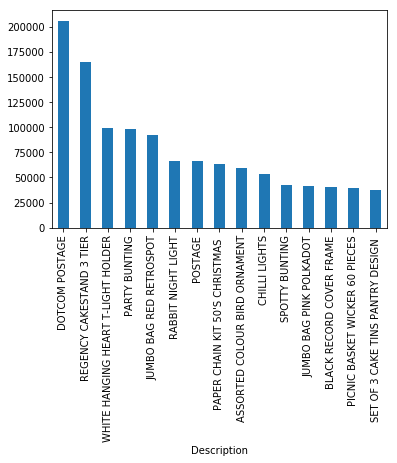

In [28]:
freq_total.head(15).plot.bar()
plt.show()

In [29]:
countrynew = data.groupby('Country')
#Negara dengan total penjualan terbesar
countrynew['TotalAmount'].agg(np.sum).sort_values(ascending=False).head(n=10)

Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974039e+05
Australia         1.370773e+05
Switzerland       5.638535e+04
Spain             5.477458e+04
Belgium           4.091096e+04
Sweden            3.659591e+04
Name: TotalAmount, dtype: float64

In [30]:
#Negara berdasarkan jumlah transaksi terbanyak
countrynew['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False).head(n=10)

Country
United Kingdom    23494
Germany             603
France              461
EIRE                360
Belgium             119
Spain               105
Netherlands         101
Switzerland          74
Portugal             71
Australia            69
Name: InvoiceNo, dtype: int64

In [31]:
#Negara berdasarkan jumlah customer terbanyak
countrynew['CustomerID'].unique().agg(np.size).sort_values(ascending=False).head(n=10)

Country
United Kingdom    3951
Germany             95
France              88
Spain               31
Belgium             25
Switzerland         22
Portugal            20
Italy               15
Finland             12
Austria             11
Name: CustomerID, dtype: int64

## Association Rule 

In [32]:
len(data[data['Description'].isnull()])

1454

In [33]:
for i, d in data[data['Description'].isnull()].iterrows():
    data['Description'][i] = "Code-" + str(d['StockCode'])

C:\Users\Narendra Dhafa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
len(data[data['Description']==data['StockCode'].map(lambda x: "Code-"+str(x))])

1454

In [37]:
invoicenonew = data.groupby('InvoiceNo')
transactions = []
for name,group in invoicenonew:
    transactions.append(list(group['Description'].map(str)))

In [44]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.005, min_confidence = 0.5, min_lift = 3, min_length = 2)
results = list(rules)

In [45]:
final = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(results), 6)), columns=['GeneralRules', 'LeftRules', 'RightRules', 'Support', 'Confidence', 'Lift'])
index = 0
for g, s, i in results:
    final.iloc[index] = [' _&&_ '.join(list(g)), ' _&&_ '.join(list(i[0][0])), ' _&&_ '.join(list(i[0][1])), s, i[0][2], i[0][3]]
    index = index+1
# The most significant rules
final = final.sort_values('Lift', ascending=0)
final.head(10)

,GeneralRules,LeftRules,RightRules,Support,Confidence,Lift
2530,HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&...,HERB MARKER PARSLEY _&&_ HERB MARKER ROSEMARY ...,HERB MARKER THYME,0.006409,0.988095,107.528011
2557,HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&...,HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&...,HERB MARKER THYME,0.006100,0.987500,107.463235
2255,HERB MARKER THYME _&&_ HERB MARKER ROSEMARY _&...,HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&...,HERB MARKER THYME,0.006525,0.982558,106.925445
2529,HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&...,HERB MARKER MINT _&&_ HERB MARKER ROSEMARY _&&...,HERB MARKER THYME,0.006139,0.981481,106.808279
2263,HERB MARKER PARSLEY _&&_ HERB MARKER ROSEMARY ...,HERB MARKER PARSLEY _&&_ HERB MARKER ROSEMARY ...,HERB MARKER THYME,0.006911,0.972826,105.866368
2250,HERB MARKER PARSLEY _&&_ HERB MARKER MINT _&&_...,HERB MARKER MINT _&&_ HERB MARKER BASIL _&&_ H...,HERB MARKER PARSLEY,0.006448,0.976608,105.833272
2532,HERB MARKER ROSEMARY _&&_ HERB MARKER CHIVES ...,HERB MARKER PARSLEY _&&_ HERB MARKER MINT _&&_...,HERB MARKER THYME,0.006564,0.971429,105.714286
2531,HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&...,HERB MARKER PARSLEY _&&_ HERB MARKER MINT _&&_...,HERB MARKER THYME,0.006680,0.966480,105.175813
2262,HERB MARKER MINT _&&_ HERB MARKER ROSEMARY _&&...,HERB MARKER MINT _&&_ HERB MARKER ROSEMARY _&&...,HERB MARKER THYME,0.006641,0.966292,105.155321
2254,HERB MARKER PARSLEY _&&_ HERB MARKER THYME _&&...,HERB MARKER PARSLEY _&&_ HERB MARKER BASIL _&&...,HERB MARKER THYME,0.006564,0.965909,105.113636


In [46]:
count=1
for i, d in final.head(20).iterrows():
    print('Rule #'+str(count)+':')
    print(d['LeftRules'])
    print('=> '+d['RightRules'])
    print('Support: '+str(d['Support'])+' - Confidence: '+str(d['Confidence'])+' - Lift: '+str(d['Lift']))
    print('______________________________________')
    count=count+1

Rule #1:
HERB MARKER PARSLEY _&&_ HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&&_ HERB MARKER CHIVES 
=> HERB MARKER THYME
Support: 0.006409266409266409 - Confidence: 0.9880952380952381 - Lift: 107.5280112044818
______________________________________
Rule #2:
HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&&_ HERB MARKER CHIVES  _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER MINT
=> HERB MARKER THYME
Support: 0.006100386100386101 - Confidence: 0.9875 - Lift: 107.46323529411765
______________________________________
Rule #3:
HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&&_ HERB MARKER CHIVES 
=> HERB MARKER THYME
Support: 0.0065250965250965255 - Confidence: 0.9825581395348838 - Lift: 106.92544459644324
______________________________________
Rule #4:
HERB MARKER MINT _&&_ HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&&_ HERB MARKER CHIVES 
=> HERB MARKER THYME
Support: 0.006138996138996139 - Confidence: 0.9814814814814815 - Lift: 106.8082788671024
______________________________________
Rule #5